In [2]:
import numpy as np
import torch
from matplotlib import pyplot as plt
import torch
import Utils
from PatchesDataset import PatchesDataset

In [12]:
torch.cuda.empty_cache()

In [4]:
model = torch.load('trained_model.pth')
model.to('cpu').eval()

Conv64Features(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=5184, out_features=64, bias=True)
)

In [5]:
left = Utils.get_left_image(180)
right = Utils.get_right_image(180)

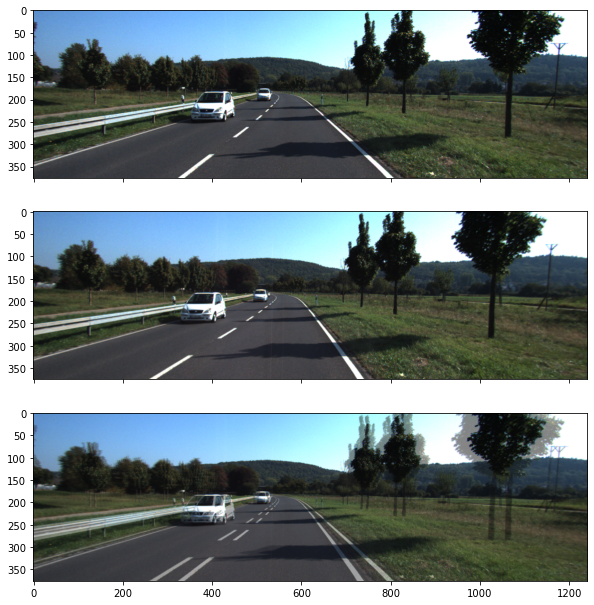

In [6]:
fig, axes = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(18.5, 10.5)
axes[0].imshow(left)
axes[1].imshow(right)
axes[2].imshow(left)
axes[2].imshow(right, alpha=0.5)

In [7]:
left_model_input = torch.as_tensor(left).detach().permute(2, 0, 1).unsqueeze(0)
right_model_input = torch.as_tensor(right).detach().permute(2, 0, 1).unsqueeze(0)

In [8]:
print(f"left_model_input shape = {left_model_input.shape}")
print(f"right_model_input shape = {right_model_input.shape}")

left_model_input shape = torch.Size([1, 3, 376, 1241])
right_model_input shape = torch.Size([1, 3, 376, 1241])


In [9]:
left_model_output = torch.zeros(size=(left_model_input.shape[2], left_model_input.shape[3], 64))
right_model_output = torch.zeros(size=(right_model_input.shape[2], right_model_input.shape[3], 64))

In [10]:
for row in range(365, left_model_output.shape[0] - 4):
    print(f"row {row}")
    for col in range(4, left_model_output.shape[1] - 4):
        features_64_at_row_col = model(left_model_input[:, :, row-4:row+5, col-4:col+5])
        left_model_output[row, col, :] = features_64_at_row_col

row 365
row 366
row 367
row 368
row 369
row 370
row 371


In [11]:
for row in range(365, right_model_output.shape[0] - 4):
    print(f"row {row}")
    for col in range(4, right_model_output.shape[1] - 4):
        features_64_at_row_col = model(right_model_input[:, :, row-4:row+5, col-4:col+5])
        right_model_output[row, col, :] = features_64_at_row_col

row 365
row 366
row 367
row 368
row 369
row 370
row 371


In [31]:
left_model_output = left_model_output.detach().numpy()
right_model_output = right_model_output.detach().numpy()

In [60]:
disp_0 = np.sum((left_model_output * right_model_output), axis=2)

In [64]:
disp_0.shape

(376, 1241)

In [41]:
a = np.array([
        [[1, 1],
         [2, 2]],

        [[3, 3],
         [4, 4]]
    ])

b = a.copy()

np.sum((a * b), axis=2)